In [1]:
import pandas as pd
import numpy as np
#import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel
import difflib

In [2]:
data = pd.read_csv("nptel_electives.csv")

In [3]:
data.drop(columns='\nCo-ordinating Institute',inplace=True)

In [4]:
CS_data = data[(data['Discipline'] == 'Computer Science and Engineering') | (data['Discipline'] == 'Computer Science & Engineering') |(data['Discipline'] == 'Electrical and Electronics Engineering,\n Computer Science and Engineering,\n VLSI Specialization')]

In [5]:
CS_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 81 to 158
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     47 non-null     int64 
 1   Course Id                      47 non-null     object
 2   Discipline                     47 non-null     object
 3   Course Name                    47 non-null     object
 4   SME Name                       47 non-null     object
 5   Institute                      47 non-null     object
 6   Duration                       47 non-null     object
 7   UG/PG                          47 non-null     object
 8   Core/Elective                  47 non-null     object
 9   Applicable NPTEL Domain        25 non-null     object
 10  Click here to join the course  47 non-null     object
 11  NPTEL URL                      47 non-null     object
 12  credits                        47 non-null     int64 
 13  Diffi

In [6]:
CS_data.head()

,Unnamed: 0,Course Id,Discipline,Course Name,SME Name,Institute,Duration,UG/PG,Core/Elective,Applicable NPTEL Domain,Click here to join the course,NPTEL URL,credits,Difficulty Level
81,181,noc23-cs01,Computer Science & Engineering,Randomized Methods in Complexity,Prof. Nitin Saxena,IITK,12 Weeks,UG/PG,Elective,NaN,https://onlinecourses.nptel.ac.in/noc23_cs01,https://nptel.ac.in/courses/106104228,3,Intermediate
82,182,noc23-cs02,Computer Science & Engineering,Introduction to programming in C,Prof. Satyadev Nandakumar,IITK,8 Weeks,UG/PG,Elective,NaN,https://onlinecourses.nptel.ac.in/noc23_cs02,https://nptel.ac.in/courses/106104128,2,Intermediate
83,183,noc23-cs03,Computer Science & Engineering,Foundations of Cryptography,Prof. Ashish Choudhury,IIIT Bangalore,12 Weeks,UG/PG,Elective,Foundations Of Computing,https://onlinecourses.nptel.ac.in/noc23_cs03,https://nptel.ac.in/courses/106106221,3,Intermediate
84,184,noc23-cs04,Computer Science and Engineering,Quantum Algorithms and Cryptography,Prof. Shweta Agrawal,IITM,12 Weeks,UG/PG,Elective,NaN,https://onlinecourses.nptel.ac.in/noc23_cs04,https://nptel.ac.in/courses/106106241,3,Intermediate
85,185,noc23-cs05,Computer Science and Engineering,An Introduction to Artificial Intelligence,Prof. Mausam,IITD,12 Weeks,UG,Elective,Artificial Intelligence\n Data Science\n Robotics,https://onlinecourses.nptel.ac.in/noc23_cs05,https://nptel.ac.in/courses/106102220,3,Beginner


In [7]:
CS_data['credits'] = CS_data['credits'].astype('str')

C:\Users\admin\AppData\Local\Temp\ipykernel_1536\2816617637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CS_data['credits'] = CS_data['credits'].astype('str')


In [8]:
CS_data['Applicable NPTEL Domain'].fillna(' ',inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_1536\2501574164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CS_data['Applicable NPTEL Domain'].fillna(' ',inplace=True)


In [9]:
feature1=CS_data['Course Name']

In [10]:
li = [i for i in range(len(CS_data))]
CS_data['index'] = li

C:\Users\admin\AppData\Local\Temp\ipykernel_1536\1304001532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CS_data['index'] = li


In [11]:
count_vect = CountVectorizer()
cv_mat = count_vect.fit_transform(feature1)
cosine_sim_mat1= cosine_similarity(cv_mat)
course_indices = pd.Series(CS_data.index,index=CS_data['Course Name']).drop_duplicates()


In [12]:
import seaborn as sns

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='credits', ylabel='count'>

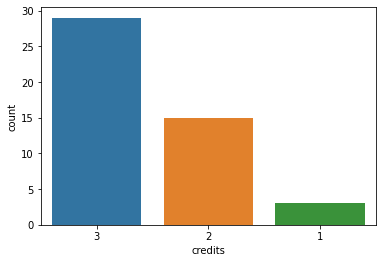

In [13]:
sns.countplot(CS_data['credits'])

<AxesSubplot:xlabel='credits', ylabel='Count'>

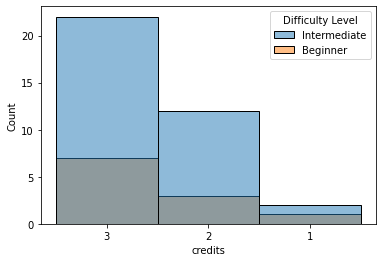

In [14]:
sns.histplot(x=CS_data['credits'],hue=CS_data['Difficulty Level'],data=CS_data)

In [15]:
cname = input("Enter Course name ")
inst = input("Institue Name ")
dur = input("Enter Course Duartion")
up = input("UG/PG")
ce = input("Core/Elective")
dom = input("Applicable NPTEL Domain")
cr = input("Enter Credits")
dfl = input("Enter Difficulty level")

title = inst+" "+dur+" "+up+" "+ce+" "+dom+" "+cr+" "+dfl

Enter Course name Data Analaytics
Institue Name IITM
Enter Course Duartion3
UG/PGUG
Core/Elective
Applicable NPTEL Domain
Enter Credits3
Enter Difficulty level


In [16]:
#title = "Getting Started with Competitive Programming I"

In [17]:
close_match = difflib.get_close_matches(cname,feature1)[0]
close_match

'Data Analytics with Python'

In [18]:
j=0
for i in feature1:
    if i==close_match:
        print("Found")
        print(i)
        print(j)
        break
    else:
        print("Not Found")
        j+=1

Not Found
Not Found
Not Found
Not Found
Not Found
Found
Data Analytics with Python
5


In [19]:
similarity_score = list(enumerate(cosine_sim_mat1[j]))

In [20]:
sorted_sim_Score = sorted(similarity_score,key=lambda x : x[1],reverse=True)
selected_course_indices = [i[0] for i in sorted_sim_Score[1:10]]
selected_course_indices
result_df = CS_data.iloc[selected_course_indices]
result_df

,Unnamed: 0,Course Id,Discipline,Course Name,SME Name,Institute,Duration,UG/PG,Core/Elective,Applicable NPTEL Domain,Click here to join the course,NPTEL URL,credits,Difficulty Level,index
98,201,noc23-cs21,Computer Science and Engineering,Python for Data Science,Prof. Ragunathan Rengasamy,IITM,4 Weeks,UG,Elective,Artificial Intelligence\n Data Science,https://onlinecourses.nptel.ac.in/noc23_cs21,https://nptel.ac.in/courses/106106212,1,Beginner,17
92,195,noc23-cs15,Computer Science and Engineering,"Programming, Data Structures And Algorithms Us...",Prof. Madhavan Mukund,CMI,8 Weeks,UG,Elective,Artificial Intelligence\n Computational Biolog...,https://onlinecourses.nptel.ac.in/noc23_cs15,https://nptel.ac.in/courses/106106145,2,Beginner,11
115,223,noc23-cs43,Computer Science and Engineering,Data Mining,Prof. Pabitra Mitra,IITKGP,8 Weeks,UG,Elective,,https://onlinecourses.nptel.ac.in/noc23_cs43,https://nptel.ac.in/courses/106105174,2,Beginner,34
94,197,noc23-cs17,Computer Science and Engineering,Data Science for Engineers,Prof. Ragunathan Rengasamy\n Prof. Shankar Nar...,IITM,8 Weeks,UG/PG,Elective,Data Science\n Programming,https://onlinecourses.nptel.ac.in/noc23_cs17,https://nptel.ac.in/courses/106106179,2,Intermediate,13
105,210,noc23-cs30,Computer Science and Engineering,Getting Started with Competitive Programming,Prof. Neeldhara Misra,IIT Gandhinagar,12 Weeks,UG,Elective,,https://onlinecourses.nptel.ac.in/noc23_cs30,https://nptel.ac.in/courses/106106231,3,Beginner,24
97,200,noc23-cs20,Computer Science and Engineering,The Joy of Computing using Python,Prof. Sudarshan Iyengar,IIT Ropar,12 Weeks,UG/PG,Elective,,https://onlinecourses.nptel.ac.in/noc23_cs20,https://nptel.ac.in/courses/106106182,3,Intermediate,16
104,208,noc23-cs28,Computer Science and Engineering,Introduction to parallel programming with Open...,Prof. Yogish Sabharwal,IITD,8 Weeks,UG/PG,Elective,Systems,https://onlinecourses.nptel.ac.in/noc23_cs28,https://nptel.ac.in/courses/106102163,2,Intermediate,23
81,181,noc23-cs01,Computer Science & Engineering,Randomized Methods in Complexity,Prof. Nitin Saxena,IITK,12 Weeks,UG/PG,Elective,,https://onlinecourses.nptel.ac.in/noc23_cs01,https://nptel.ac.in/courses/106104228,3,Intermediate,0
82,182,noc23-cs02,Computer Science & Engineering,Introduction to programming in C,Prof. Satyadev Nandakumar,IITK,8 Weeks,UG/PG,Elective,,https://onlinecourses.nptel.ac.in/noc23_cs02,https://nptel.ac.in/courses/106104128,2,Intermediate,1


In [23]:
result_df.shape

(9, 15)

In [24]:
result_df['credits'].value_counts()

2    5
3    3
1    1
Name: credits, dtype: int64

In [31]:
new_df = result_df[result_df['credits'] == '2']

In [32]:
new_df

,Unnamed: 0,Course Id,Discipline,Course Name,SME Name,Institute,Duration,UG/PG,Core/Elective,Applicable NPTEL Domain,Click here to join the course,NPTEL URL,credits,Difficulty Level,index
92,195,noc23-cs15,Computer Science and Engineering,"Programming, Data Structures And Algorithms Us...",Prof. Madhavan Mukund,CMI,8 Weeks,UG,Elective,Artificial Intelligence\n Computational Biolog...,https://onlinecourses.nptel.ac.in/noc23_cs15,https://nptel.ac.in/courses/106106145,2,Beginner,11
115,223,noc23-cs43,Computer Science and Engineering,Data Mining,Prof. Pabitra Mitra,IITKGP,8 Weeks,UG,Elective,,https://onlinecourses.nptel.ac.in/noc23_cs43,https://nptel.ac.in/courses/106105174,2,Beginner,34
94,197,noc23-cs17,Computer Science and Engineering,Data Science for Engineers,Prof. Ragunathan Rengasamy\n Prof. Shankar Nar...,IITM,8 Weeks,UG/PG,Elective,Data Science\n Programming,https://onlinecourses.nptel.ac.in/noc23_cs17,https://nptel.ac.in/courses/106106179,2,Intermediate,13
104,208,noc23-cs28,Computer Science and Engineering,Introduction to parallel programming with Open...,Prof. Yogish Sabharwal,IITD,8 Weeks,UG/PG,Elective,Systems,https://onlinecourses.nptel.ac.in/noc23_cs28,https://nptel.ac.in/courses/106102163,2,Intermediate,23
82,182,noc23-cs02,Computer Science & Engineering,Introduction to programming in C,Prof. Satyadev Nandakumar,IITK,8 Weeks,UG/PG,Elective,,https://onlinecourses.nptel.ac.in/noc23_cs02,https://nptel.ac.in/courses/106104128,2,Intermediate,1


In [34]:
new_df_2 = result_df[result_df['Institute']=='IITM']
new_df_2

,Unnamed: 0,Course Id,Discipline,Course Name,SME Name,Institute,Duration,UG/PG,Core/Elective,Applicable NPTEL Domain,Click here to join the course,NPTEL URL,credits,Difficulty Level,index
98,201,noc23-cs21,Computer Science and Engineering,Python for Data Science,Prof. Ragunathan Rengasamy,IITM,4 Weeks,UG,Elective,Artificial Intelligence\n Data Science,https://onlinecourses.nptel.ac.in/noc23_cs21,https://nptel.ac.in/courses/106106212,1,Beginner,17
94,197,noc23-cs17,Computer Science and Engineering,Data Science for Engineers,Prof. Ragunathan Rengasamy\n Prof. Shankar Nar...,IITM,8 Weeks,UG/PG,Elective,Data Science\n Programming,https://onlinecourses.nptel.ac.in/noc23_cs17,https://nptel.ac.in/courses/106106179,2,Intermediate,13


In [21]:
feature_selected = result_df['Institute'] + " " + result_df['Duration'] + " " + result_df['UG/PG'] + " " + result_df['Core/Elective'] + " " + result_df['Applicable NPTEL Domain'] + " " + result_df['credits'] + " " + result_df['Difficulty Level']